## **Analyse et Visualisation des Données de Contacts téléphonique PG : Prétraitement, Qualité des Données et Répartition Géographique**

1. **Chargement des Données** :
   - Charger le fichier CSV contenant les données des contacts.

2. **Exploration Initiale des Données** :
   - Afficher les premières lignes du fichier pour avoir un aperçu du contenu.
   - Afficher les informations sur les colonnes pour comprendre la structure des données.
   - Afficher les statistiques descriptives brutes des colonnes.

3. **Identification et Gestion des Doublons** :
   - Identifier et compter les lignes en doublons dans les données.

4. **Extraction des Composants de l'Adresse** :
   - Utiliser une fonction pour extraire le numéro de rue et l'adresse à partir de la colonne `pj-lb`.
   - Appliquer cette fonction à la colonne `pj-lb` pour créer de nouvelles colonnes `Numéro_d'Adresse` et `Adresse`.

5. **Extraction des Composants de l'Adresse (Code Postal et Ville)** :
   - Utiliser une fonction pour extraire le code postal et la ville à partir de la colonne `pj-lb`.
   - Appliquer cette fonction à la colonne `pj-lb` pour créer de nouvelles colonnes `Code_Postal` et `Ville`.

6. **Séparation du Nom et du Prénom** :
   - Utiliser une fonction pour séparer le nom complet en nom et prénom.

7. **Validation des Numéros de Téléphone** :
   - Utiliser une fonction pour vérifier la validité d'un numéro de téléphone.
   - Utiliser une fonction pour catégoriser les numéros de téléphone en `portable` ou `fixe`.
   - Appliquer ces fonctions à la colonne `number-contact 2` pour créer des colonnes `Numéro_Valide` et `Type_Numéro`.

8. **Marquage des Contacts Qualifiés et Non Qualifiés** :
   - Marquer les contacts opposés aux opérations de marketing comme `NQ` (Non Qualifié).
   - Mettre à jour la qualification en fonction de la validité du numéro.

9. **Réorganisation des Colonnes** :
   - Réorganiser les colonnes pour une meilleure lisibilité et suppression des colonnes indésirables.

10. **Comptage des Numéros Uniques** :
    - Compter le nombre de numéros de téléphone uniques, fixes, et portables.

11. **Analyse des Contacts Qualifiés et Non Qualifiés** :
    - Calculer le nombre de contacts qualifiés (Q) et non qualifiés (NQ) pour les numéros portables et fixes.
    - Calculer les ratios en pourcentage de contacts qualifiés et non qualifiés pour les portables.

12. **Distribution par Ville** :
    - Calculer la distribution des contacts par ville.
    - Filtrer les villes avec plus de 10 contacts.
    - Calculer le nombre de contacts qualifiés (Q) et non qualifiés (NQ) pour chaque ville.
    - Créer un DataFrame pour la distribution des villes avec Q et NQ en pourcentage.

13. **Visualisations** :
    - Créer un histogramme pour la distribution des villes avec plus de 10 contacts.

14. **Propositions d'Analyses Supplémentaires et de Visualisations** :
    - Répartition des contacts qualifiés et non qualifiés par ville.
    - Répartition des types de numéros (fixe vs portable) par ville.
    - Répartition des contacts qualifiés et non qualifiés pour les numéros portables et fixes par ville.
    - Nombre de contacts par ville pour les portables.
    - Répartition des contacts par code postal.
    - Analyse des numéros de téléphone non valides.
    - Heatmap des corrélations entre les différentes variables.
    - Affichage de la densité des contacts sur une carte.

Ces étapes permettent de prétraiter, analyser, et visualiser les données de manière exhaustive, offrant ainsi une vue d'ensemble complète des informations contenues dans le fichier CSV.

### **CODE**

Premières lignes du fichier :


,bi-denomination href,bi-denomination,pj-lb,pj-lb href,label-adresse,value,number-contact,number-contact 2,screenreader
0,https://www.pagesjaunes.fr/pagesblanches/reche...,Pierin Nathalie,"7 r Clérion, 13530 Trets",https://www.pagesjaunes.fr/pagesblanches/reche...,Voir le plan,Afficher le N°,Tél :,09 75 20 71 55,NaN



Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bi-denomination href  2636 non-null   object
 1   bi-denomination       2636 non-null   object
 2   pj-lb                 2625 non-null   object
 3   pj-lb href            2625 non-null   object
 4   label-adresse         2625 non-null   object
 5   value                 2610 non-null   object
 6   number-contact        2511 non-null   object
 7   number-contact 2      2475 non-null   object
 8   screenreader          1298 non-null   object
dtypes: object(9)
memory usage: 185.5+ KB

Statistiques descriptives brutes :


,bi-denomination href,bi-denomination,pj-lb,pj-lb href,label-adresse,value,number-contact,number-contact 2,screenreader
count,2636,2636,2625,2625,2625,2610,2511,2475,1298
unique,1082,2426,2566,152,1,3,32,2421,2
top,https://www.pagesjaunes.fr/pagesblanches/reche...,Martin Nathalie,1 Bis rue Pastoret 13006 Marseille,https://www.pagesjaunes.fr/pagesblanches/reche...,Voir le plan,Afficher le N°,Tél :,06 22 38 60 35,Opposé aux opérations de marketing
freq,20,11,4,21,2625,2033,2477,4,1290



Nombre de lignes en doublons : 13
Nombre de numéros de téléphone uniques : 2421
Nombre de numéros de téléphone fixe : 1883
Nombre de numéros de téléphone portable : 540
Nombre de contacts qualifiés (Q) pour les portables : 460
Nombre de contacts non qualifiés (NQ) pour les portables : 111
Nombre de contacts qualifiés (Q) pour les fixes : 729
Nombre de contacts non qualifiés (NQ) pour les fixes : 1175
Ratio de contacts qualifiés (Q) pour les portables : 17.45%
Ratio de contacts non qualifiés (NQ) pour les portables : 4.21%
Nombre de villes : 113

Distribution des villes (plus de 10 contacts) avec Q et NQ en pourcentage :


,Total,Qualifiés (%),Non Qualifiés (%)
Ville,,,
,1226.0,63.2,36.8
Aix en Provence,118.0,36.4,63.6
Allauch,21.0,33.3,66.7
Alleins,0.0,inf,inf
Arles,37.0,32.4,67.6
...,...,...,...
Velaux,0.0,NaN,inf
Venelles,0.0,inf,inf
Ventabren,0.0,inf,inf


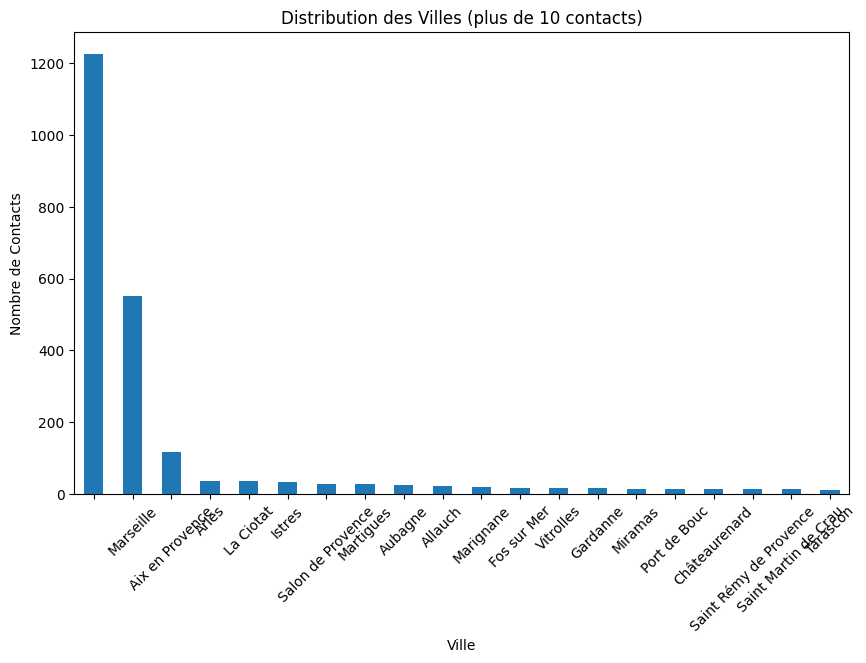

In [30]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = r'C:\\Users\\change\\Desktop\\GROUP ECO\\PJSCRAP\\Bouches du rhones\\Nathalie.csv'
data = pd.read_csv(file_path)

# Afficher les premières lignes du fichier
print("Premières lignes du fichier :")
display(data.head(1))

# Afficher les informations sur les colonnes et les statistiques descriptives brutes
print("\nInformations sur les colonnes :")
data_info = data.info()

print("\nStatistiques descriptives brutes :")
data_describe = data.describe(include='all')
display(data_describe)

# Identifier et compter les lignes en doublons
duplicates_count = data.duplicated().sum()
print(f"\nNombre de lignes en doublons : {duplicates_count}")

# Fonction pour extraire les composants de l'adresse
def num_rue_adresse(address):
    parts = address.split(',')
    if len(parts) >= 2:
        # Extraire le numéro de rue comme le premier nombre dans l'adresse
        numero_rue = ''.join([char for char in parts[0].strip() if char.isdigit()])
        
        # Extraire l'adresse comme tout ce qui se trouve après le numéro de rue et avant la virgule
        adresse = ' '.join(parts[0].strip().split()[1:]) if numero_rue else parts[0].strip()
        
        return pd.Series([numero_rue, adresse])
    return pd.Series([address, ''])

# Appliquer la fonction num_rue_adresse à la colonne pj-lb
data[['Numéro_d\'Adresse', 'Adresse']] = data['pj-lb'].apply(
    lambda x: num_rue_adresse(x) if pd.notnull(x) else pd.Series(['', ''])
)

# Fonction pour extraire les composants de l'adresse
def split_address_pj_lb(address):
    # Regex pour extraire les composants
    match = re.match(r'\d+\s+.+?,\s*(\d+)\s*(.*)', address.strip())
    if match:
        code_postal = match.group(1)
        ville = match.group(2).strip()
        return pd.Series([code_postal, ville])
    return pd.Series(['', ''])

# Appliquer la fonction split_address_pj_lb à la colonne pj-lb
data[['Code_Postal', 'Ville']] = data['pj-lb'].apply(
    lambda x: split_address_pj_lb(x) if pd.notnull(x) else pd.Series(['', ''])
)

# Fonction pour séparer le nom et le prénom
def split_name(full_name):
    parts = full_name.split(' ', 1)
    if len(parts) == 2:
        return parts[0], parts[1]
    else:
        return parts[0], ''

# Fonction pour vérifier la validité d'un numéro de téléphone
def is_valid_number(number):
    # Ajouter votre logique de validation ici
    return True  # Par défaut, tous les numéros sont valides

# Fonction pour catégoriser les numéros de téléphone
def categorize_number(number):
    number = str(number)  # Convertir en chaîne de caractères pour éviter les erreurs
    if number.startswith('06') or number.startswith('07'):
        return 'portable'
    else:
        return 'fixe'

# Appliquer les fonctions à la colonne 'number-contact 2'
data['Numéro_Valide'] = data['number-contact 2'].apply(lambda x: is_valid_number(x) if pd.notnull(x) else False)
data['Type_Numéro'] = data['number-contact 2'].apply(lambda x: categorize_number(x) if pd.notnull(x) else '')

data['Téléphone_Portable'] = data.apply(lambda row: row['number-contact 2'] if row['Type_Numéro'] == 'portable' else '', axis=1)
data['Téléphone_Fixe'] = data.apply(lambda row: row['number-contact 2'] if row['Type_Numéro'] == 'fixe' else '', axis=1)

# Marquer les contacts opposés aux opérations de marketing comme NQ (Non Qualifié)
data['Qualification'] = data.apply(
    lambda row: 'NQ' if row['screenreader'] == 'Opposé aux opérations de marketing' else 'Q', axis=1
)

# Mettre à jour la qualification en fonction de la validité du numéro
data['Qualification'] = data.apply(
    lambda row: 'NQ' if not row['Numéro_Valide'] else row['Qualification'], axis=1
)

# Réorganiser les colonnes et supprimer les colonnes indésirables
if 'Nom' in data.columns and 'Prénom' in data.columns:
    columns_order = ['Qualification', 'Nom', 'Prénom', 'Téléphone_Portable', 'Téléphone_Fixe', 
                     'Numéro_d\'Adresse', 'Adresse', 'Code_Postal', 'Ville']
else:
    columns_order = ['Qualification', 'Téléphone_Portable', 'Téléphone_Fixe', 
                     'Numéro_d\'Adresse', 'Adresse', 'Code_Postal', 'Ville']

data = data[columns_order + [col for col in data.columns if col not in columns_order]]

# Compter le nombre de numéros de téléphone uniques
unique_phone_numbers = data['number-contact 2'].nunique()
print(f"Nombre de numéros de téléphone uniques : {unique_phone_numbers}")

# Compter le nombre de numéros de téléphone fixe
unique_fixed_numbers = data['Téléphone_Fixe'].nunique()
print(f"Nombre de numéros de téléphone fixe : {unique_fixed_numbers}")

# Compter le nombre de numéros de téléphone portable
unique_mobile_numbers = data['Téléphone_Portable'].nunique()
print(f"Nombre de numéros de téléphone portable : {unique_mobile_numbers}")

# Calculer le nombre de contacts qualifiés (Q) et non qualifiés (NQ) pour les portables
q_portable_contacts = len(data[(data['Qualification'] == 'Q') & (data['Type_Numéro'] == 'portable')])
nq_portable_contacts = len(data[(data['Qualification'] == 'NQ') & (data['Type_Numéro'] == 'portable')])

# Afficher les résultats pour les portables
print(f"Nombre de contacts qualifiés (Q) pour les portables : {q_portable_contacts}")
print(f"Nombre de contacts non qualifiés (NQ) pour les portables : {nq_portable_contacts}")

# Calculer le nombre de contacts qualifiés (Q) et non qualifiés (NQ) pour les fixes
q_fixed_contacts = len(data[(data['Qualification'] == 'Q') & (data['Type_Numéro'] == 'fixe')])
nq_fixed_contacts = len(data[(data['Qualification'] == 'NQ') & (data['Type_Numéro'] == 'fixe')])

# Afficher les résultats pour les fixes
print(f"Nombre de contacts qualifiés (Q) pour les fixes : {q_fixed_contacts}")
print(f"Nombre de contacts non qualifiés (NQ) pour les fixes : {nq_fixed_contacts}")

# Calculer les ratios en pourcentage
total_contacts = len(data)
ratio_q_portable = (q_portable_contacts / total_contacts) * 100 if total_contacts else 0
ratio_nq_portable = (nq_portable_contacts / total_contacts) * 100 if total_contacts else 0

# Afficher les ratios
print(f"Ratio de contacts qualifiés (Q) pour les portables : {ratio_q_portable:.2f}%")
print(f"Ratio de contacts non qualifiés (NQ) pour les portables : {ratio_nq_portable:.2f}%")


# nombre de villes
nbr_villes = data['Ville'].nunique()
print(f"Nombre de villes : {nbr_villes}")


# Calculer la distribution des villes
ville_distribution = data['Ville'].value_counts()

# Filtrer les villes avec plus de 10 contacts
filtered_ville_distribution = ville_distribution[ville_distribution > 10]

# Calculer le nombre de contacts qualifiés (Q) et non qualifiés (NQ) pour chaque ville
q_counts = data[data['Qualification'] == 'Q']['Ville'].value_counts()
nq_counts = data[data['Qualification'] == 'NQ']['Ville'].value_counts()

# Créer un DataFrame pour la distribution des villes avec Q et NQ en pourcentage
distribution_df = pd.DataFrame({
    'Total': filtered_ville_distribution,
    'Qualifiés (Q)': q_counts,
    'Non Qualifiés (NQ)': nq_counts
})

# Remplacer les NaN par 0 pour les colonnes Q et NQ
distribution_df = distribution_df.fillna(0)

# Calculer les pourcentages
distribution_df['Qualifiés (%)'] = ((distribution_df['Qualifiés (Q)'] / distribution_df['Total']) * 100).round(1    )
distribution_df['Non Qualifiés (%)'] = ((distribution_df['Non Qualifiés (NQ)'] / distribution_df['Total']) * 100).round(1)

# Afficher la distribution des villes dans un tableau avec les colonnes supplémentaires en pourcentage
print("\nDistribution des villes (plus de 10 contacts) avec Q et NQ en pourcentage :")
display(distribution_df[['Total', 'Qualifiés (%)', 'Non Qualifiés (%)']])




# Créer un histogramme pour la distribution des villes avec plus de 10 contacts
plt.figure(figsize=(10, 6))
filtered_ville_distribution.plot(kind='bar')
plt.title('Distribution des Villes (plus de 10 contacts)')
plt.xlabel('Ville')
plt.ylabel('Nombre de Contacts')
plt.xticks(rotation=45)
plt.show()

In [31]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Réduire les données aux villes avec plus de 10 contacts
filtered_data = data[data['Ville'].isin(filtered_ville_distribution.index)]

# Analyse 1: Répartition des contacts qualifiés et non qualifiés par ville
fig1 = px.bar(
    filtered_data.groupby(['Ville', 'Qualification']).size().reset_index(name='Nombre de Contacts'),
    x='Ville',
    y='Nombre de Contacts',
    color='Qualification',
    title='Répartition des Contacts Qualifiés et Non Qualifiés par Ville',
    labels={'Nombre de Contacts': 'Nombre de Contacts', 'Ville': 'Ville'},
    barmode='stack'
)
fig1.update_layout(xaxis_title='Ville', yaxis_title='Nombre de Contacts')
fig1.show()

# Analyse 2: Répartition des types de numéros (fixe vs portable) par ville
number_type_distribution_by_city = filtered_data.groupby(['Ville', 'Type_Numéro']).size().reset_index(name='Nombre de Contacts')
fig2 = px.bar(
    number_type_distribution_by_city,
    x='Ville',
    y='Nombre de Contacts',
    color='Type_Numéro',
    title='Répartition des Types de Numéros (Fixe vs Portable) par Ville',
    labels={'Nombre de Contacts': 'Nombre de Contacts', 'Ville': 'Ville'},
    barmode='stack'
)
fig2.update_layout(xaxis_title='Ville', yaxis_title='Nombre de Contacts')
fig2.show()

# Analyse 3: Répartition des contacts qualifiés et non qualifiés pour les numéros portables par ville
portable_qualification_by_city = filtered_data[filtered_data['Type_Numéro'] == 'portable'].groupby(['Ville', 'Qualification']).size().reset_index(name='Nombre de Contacts')
fig3 = px.bar(
    portable_qualification_by_city,
    x='Ville',
    y='Nombre de Contacts',
    color='Qualification',
    title='Répartition des Contacts Qualifiés et Non Qualifiés pour les Numéros Portables par Ville',
    labels={'Nombre de Contacts': 'Nombre de Contacts', 'Ville': 'Ville'},
    barmode='stack'
)
fig3.update_layout(xaxis_title='Ville', yaxis_title='Nombre de Contacts')
fig3.show()

# Analyse 4: Répartition des contacts qualifiés et non qualifiés pour les numéros fixes par ville
fixed_qualification_by_city = filtered_data[filtered_data['Type_Numéro'] == 'fixe'].groupby(['Ville', 'Qualification']).size().reset_index(name='Nombre de Contacts')
fig4 = px.bar(
    fixed_qualification_by_city,
    x='Ville',
    y='Nombre de Contacts',
    color='Qualification',
    title='Répartition des Contacts Qualifiés et Non Qualifiés pour les Numéros Fixes par Ville',
    labels={'Nombre de Contacts': 'Nombre de Contacts', 'Ville': 'Ville'},
    barmode='stack'
)
fig4.update_layout(xaxis_title='Ville', yaxis_title='Nombre de Contacts')
fig4.show()

# Analyse 5: Nombre de contacts par ville pour les portables
portable_city_distribution = filtered_data[filtered_data['Type_Numéro'] == 'portable']['Ville'].value_counts()
fig5 = px.bar(
    portable_city_distribution,
    x=portable_city_distribution.index,
    y=portable_city_distribution.values,
    title='Nombre de Contacts par Ville pour les Portables',
    labels={'y': 'Nombre de Contacts', 'x': 'Ville'}
)
fig5.update_layout(xaxis_title='Ville', yaxis_title='Nombre de Contacts')
fig5.show()


In [33]:
# Analyse 6: Répartition des contacts par code postal
postal_code_distribution = filtered_data['Code_Postal'].value_counts()
fig6 = px.bar(
    postal_code_distribution,
    x=postal_code_distribution.index,
    y=postal_code_distribution.values,
    title='Répartition des Contacts par Code Postal',
    labels={'y': 'Nombre de Contacts', 'x': 'Code Postal'}
)
fig6.update_layout(xaxis_title='Code Postal', yaxis_title='Nombre de Contacts')
fig6.show()

# Analyse 7: Répartition des contacts qualifiés et non qualifiés par code postal
qualification_by_postal_code = filtered_data.groupby(['Code_Postal', 'Qualification']).size().reset_index(name='Nombre de Contacts')
fig7 = px.bar(
    qualification_by_postal_code,
    x='Code_Postal',
    y='Nombre de Contacts',
    color='Qualification',
    title='Répartition des Contacts Qualifiés et Non Qualifiés par Code Postal',
    labels={'Nombre de Contacts': 'Nombre de Contacts', 'Code_Postal': 'Code Postal'},
    barmode='stack'
)
fig7.update_layout(xaxis_title='Code Postal', yaxis_title='Nombre de Contacts')
fig7.show()


In [37]:
! pip install plotly pandas


Defaulting to user installation because normal site-packages is not writeable


In [46]:
! pip install Nominatim

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2351 sha256=274b4ffe21c371450c2ad48bf8655502fc9070d46fc0a4e6e34d2f24cd5846a5
  Stored in directory: c:\users\change\appdata\local\pip\cache\wheels\9e\d5\ce\3b990974d5634e1e1f89f673afac6eef48ca309c185822a220
Successfully built Nominatim


In [52]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Check if 'Ville' column exists in 'data' DataFrame
if 'Ville' in data.columns:
    ville_distribution = data['Ville'].value_counts().reset_index()
    ville_distribution.columns = ['Ville', 'Nombre de Contacts']

    # Initialiser le géocodeur
    geolocator = Nominatim(user_agent="geoapiExercises")

    # Obtenir les coordonnées GPS des villes
    def get_lat_lon(ville):
        try:
            location = geolocator.geocode(ville + ", France")
            if location:
                return location.latitude, location.longitude
            return None, None
        except:
            return None, None
else:
    ville_distribution = pd.DataFrame(columns=['Ville', 'Nombre de Contacts'])
if 'Ville' in data.columns:
    ville_distribution = data['Ville'].value_counts().reset_index()
    ville_distribution.columns = ['Ville', 'Nombre de Contacts']
else:
    ville_distribution = pd.DataFrame(columns=['Ville', 'Nombre de Contacts'])

# Initialiser le géocodeur
geolocator = Nominatim(user_agent="geoapiExercises")

# Obtenir les coordonnées GPS des villes
def get_lat_lon(ville):
    try:
        location = geolocator.geocode(ville + ", France")
        if location:
            return location.latitude, location.longitude
        return None, None
    except:
        return None, None

# Créer la carte
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6, tiles='cartodbpositron')

# Ajouter les points à la carte
for idx, row in ville_distribution.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Nombre de Contacts'] * 0.05,  # Ajuster la taille du cercle en fonction du nombre de contacts
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Ville: {row['Ville']}<br>Contacts: {row['Nombre de Contacts']}"
    ).add_to(m)

# Afficher la carte
m
